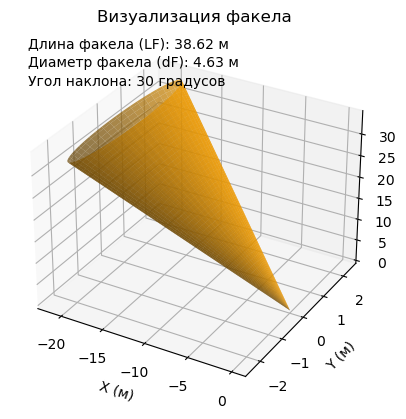

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calculate_flare_length_and_diameter(G, k=12.3, increase_length=False):
    """
    Рассчитать длину (LF) и диаметр (dF) факела на основе расхода газа (G).

    Параметры:
    G (float): Расход газа в кг/с.
    k (float): Коэффициент пропорциональности, по умолчанию 12.3.
    increase_length (bool): Увеличивать ли длину на 25% из-за граничных условий, по умолчанию False.

    Возвращает:
    tuple: Кортеж, содержащий длину (LF) и диаметр (dF) факела.
    """
    # Рассчитать длину и диаметр факела
    LF = k * (G ** 0.4)
    dF = 0.15 * k * (G ** 0.4)
    
    # Увеличить длину на 25% при необходимости
    if increase_length:
        LF *= 1.25
    
    return LF, dF

def plot_flare_cone(LF, dF, angle=30):
    """
    Визуализировать конус факела.

    Параметры:
    LF (float): Длина факела.
    dF (float): Диаметр широкой части факела.
    angle (float): Угол наклона к горизонтальной оси в градусах.
    """
    # Создаем фигуру и 3D-ось
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Создаем координаты для конуса
    z = np.linspace(0, LF, 100)
    radius = np.linspace(0, dF / 2, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    Z, Theta = np.meshgrid(z, theta)
    X = radius * np.cos(Theta)
    Y = radius * np.sin(Theta)
    
    # Поворачиваем конус на заданный угол
    angle_rad = np.radians(angle)
    X_rot = X * np.cos(angle_rad) - Z * np.sin(angle_rad)
    Z_rot = X * np.sin(angle_rad) + Z * np.cos(angle_rad)
    
    # Визуализируем конус
    ax.plot_surface(X_rot, Y, Z_rot, color='orange', alpha=0.7)

    # Устанавливаем метки осей
    ax.set_xlabel('X (м)')
    ax.set_ylabel('Y (м)')
    ax.set_zlabel('Z (м)')
    ax.set_title('Визуализация факела')

    # Печатаем данные на графике
    ax.text2D(0.05, 0.95, f"Длина факела (LF): {LF:.2f} м", transform=ax.transAxes)
    ax.text2D(0.05, 0.90, f"Диаметр факела (dF): {dF:.2f} м", transform=ax.transAxes)
    ax.text2D(0.05, 0.85, f"Угол наклона: {angle} градусов", transform=ax.transAxes)

    # Показываем график
    plt.show()

# Пример использования:
G = 10  # Пример расхода газа в кг/с
LF, dF = calculate_flare_length_and_diameter(G, increase_length=True)
plot_flare_cone(LF, dF)